<a href="https://colab.research.google.com/github/nijinpaul/Assignments/blob/main/Multi_Linea_Regression_50_startups(Rev_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare a prediction model for profit of 50_startups data.

In [ ]:
pip install ml_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from ml_metrics import mse
print("Required Libraries Imported!")

Required Libraries Imported!


In [ ]:
dataset = pd.read_csv('/content/50_Startups.csv')

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset.columns = ['RD_Spend', 'Administration', 'MarketingSpend', 'State', 'Profit']

In [ ]:
dataset.head()

,RD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RD_Spend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#Checking the distribution and outliers 

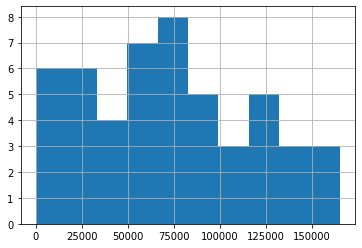

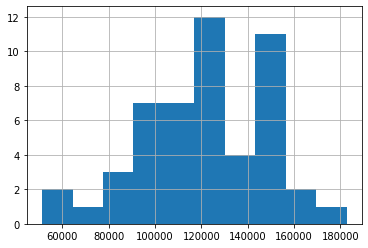

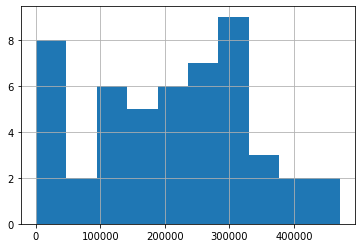

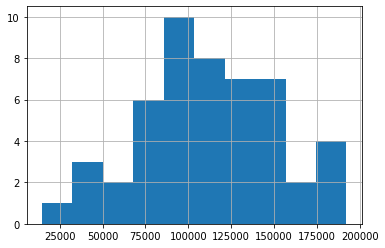

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


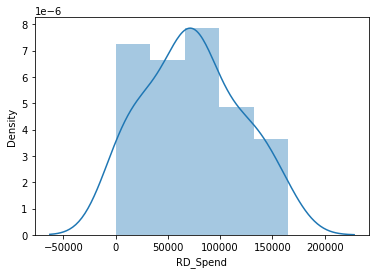

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


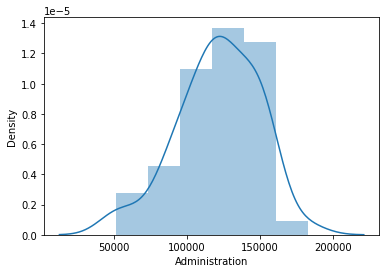

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


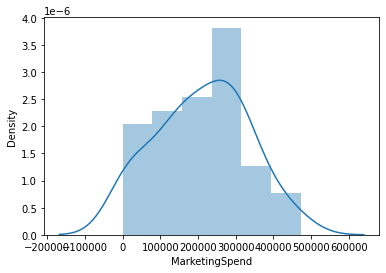

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


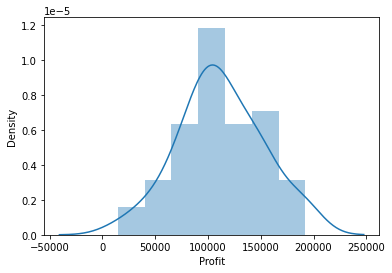

In [ ]:
#Visualisation
dataset['RD_Spend'].hist()
plt.show()
dataset['Administration'].hist()
plt.show()
dataset['MarketingSpend'].hist()
plt.show()
dataset['Profit'].hist()
plt.show()
sns.distplot(dataset['RD_Spend'])
plt.show()
sns.distplot(dataset['Administration'])
plt.show()
sns.distplot(dataset['MarketingSpend'])
plt.show()
sns.distplot(dataset['Profit'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


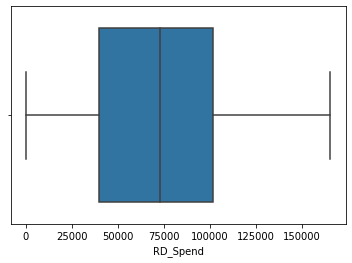

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


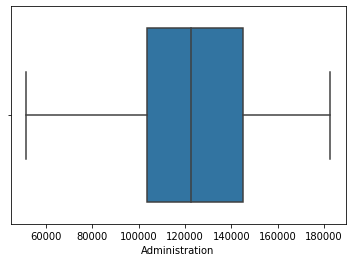

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


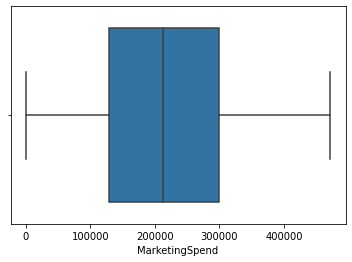

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


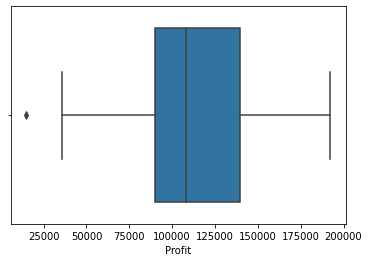

In [ ]:
sns.boxplot(dataset['RD_Spend'])
plt.show()
sns.boxplot(dataset['Administration'])
plt.show()
sns.boxplot(dataset['MarketingSpend'])
plt.show()
sns.boxplot(dataset['Profit'])

Profit Column has an Outliers

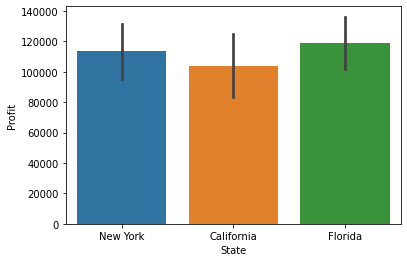

In [ ]:
# Checking relationship of State variable with Y
sns.barplot(x='State',y='Profit',data=dataset)
plt.show()

All the three states having almost same profit level . So state variable cannot be used as a predictor

In [ ]:
#Creating new dataframe by dropping State variable
df1=dataset[['RD_Spend','Administration','MarketingSpend','Profit']]
df1.head()

,RD_Spend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
df1.describe()

,RD_Spend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


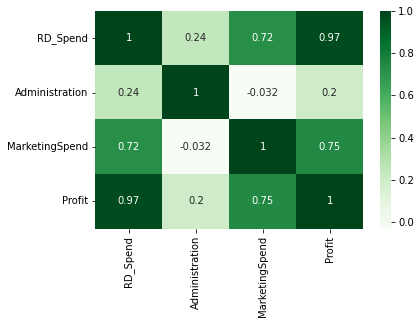

In [ ]:
# Checking correlation using correlation matrix and pairplot
ax = sns.heatmap(df1.corr(),annot=True,cmap='Greens') 

Output variable(Profit) has a high correlation(0.97) with R&D and medium correlation(0.75) with Marketing_Spend low correlation(0.2)

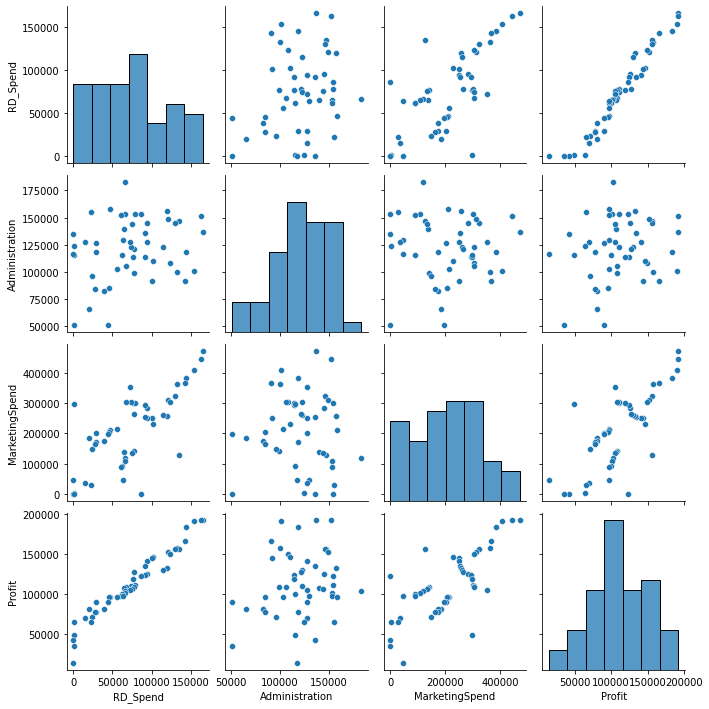

In [ ]:
# Creating pairplot
sns.pairplot(df1[['RD_Spend','Administration','MarketingSpend','Profit']])

In [ ]:
#Standardize the values
array_df1=df1.values
standard_df1=StandardScaler().fit(array_df1).transform(array_df1)
standard_df1[0:5]

array([[ 2.01641149,  0.56075291,  2.15394309,  2.01120333],
       [ 1.95586034,  1.08280658,  1.9236004 ,  1.99942997],
       [ 1.75436374, -0.72825703,  1.62652767,  1.98084225],
       [ 1.55478369, -0.09636463,  1.42221024,  1.77662724],
       [ 1.5049372 , -1.07991935,  1.28152771,  1.35774012]])

In [ ]:
# creating dataframe of standardized values
df2=pd.DataFrame({'rd_spend':standard_df1[:,0],'administration':standard_df1[:,1],'marketing_spend':standard_df1[:,2],'profit':standard_df1[:,3]})
df2.head()

,rd_spend,administration,marketing_spend,profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


#Modeling

###Create model with each independent variable

In [ ]:
#Model with independent variable R&D Spend
model1 = smf.ols('profit~rd_spend',data=df2).fit()
print('p-value:',model1.pvalues)
print("R-squared value",model1.rsquared)
print("Adjusted R-squared value:",model1.rsquared_adj)

p-value: Intercept    1.000000e+00
rd_spend     3.500322e-32
dtype: float64
R-squared value 0.9465353160804392
Adjusted R-squared value: 0.9454214684987816


Here p-value of rd_spend is less than 0.05 so it is significant

In [ ]:
#Model with independent variable Administration
model2 = smf.ols('profit~administration',data=df2).fit()
print('p-value:',model2.pvalues)
print("R-squared value",model2.rsquared)
print("Adjusted R-squared value:",model2.rsquared_adj)

p-value: Intercept         1.000000
administration    0.162217
dtype: float64
R-squared value 0.04028714077757234
Adjusted R-squared value: 0.020293122877105163


Here p-value of administration is more than 0.05 so it is not significant

In [ ]:
#Model with independent variable Marketing spend
model3 = smf.ols('profit~marketing_spend',data=df2).fit()
print('p-value:',model3.pvalues)
print("R-squared value",model3.rsquared)
print("Adjusted R-squared value:",model3.rsquared_adj)

p-value: Intercept          1.000000e+00
marketing_spend    4.381073e-10
dtype: float64
R-squared value 0.5591535746115515
Adjusted R-squared value: 0.5499692740826254
p-value: Intercept          1.000000e+00
marketing_spend    4.381073e-10
dtype: float64
R-squared value 0.5591535746115515
Adjusted R-squared value: 0.5499692740826254


ere p-value of marketing spend is less than 0.05 so it is significant

In [ ]:
#Model with independent variable R&D spend and Administration
model4 = smf.ols('profit~rd_spend+administration',data=df2).fit()
print('p-value:',model4.pvalues)
print("R-squared value",model4.rsquared)
print("Adjusted R-squared value:",model4.rsquared_adj)

p-value: Intercept         1.000000e+00
rd_spend          2.278348e-31
administration    2.888932e-01
dtype: float64
R-squared value 0.9478129385009173
Adjusted R-squared value: 0.9455922124796797


In [ ]:
#Model with independent variable R&D spend and Marketing spend
model5 = smf.ols('profit~rd_spend+marketing_spend',data=df2).fit()
print('p-value:',model5.pvalues)
print("R-squared value",model5.rsquared)
print("Adjusted R-squared value:",model5.rsquared_adj)

p-value: Intercept          1.000000e+00
rd_spend           6.040433e-24
marketing_spend    6.003040e-02
dtype: float64
R-squared value 0.9504503015559763
Adjusted R-squared value: 0.9483418037498477


In [ ]:
#Model with independent variable administration spend and Marketing spend
model6 = smf.ols('profit~marketing_spend+administration',data=df2).fit()
print('p-value:',model6.pvalues)
print("R-squared value",model6.rsquared)
print("Adjusted R-squared value:",model6.rsquared_adj)

p-value: Intercept          1.000000e+00
marketing_spend    9.727245e-11
administration     1.729198e-02
dtype: float64
R-squared value 0.6097229746770663
Adjusted R-squared value: 0.593115441684601


In [ ]:
#Model with independent variable r&d spend,administration spend and Marketing spend
model7 = smf.ols('profit~rd_spend+marketing_spend+administration',data=df2).fit()
print('p-value:',model7.pvalues)
print("R-squared value",model7.rsquared)
print("Adjusted R-squared value:",model7.rsquared_adj)

p-value: Intercept          1.000000e+00
rd_spend           2.634968e-22
marketing_spend    1.047168e-01
administration     6.017551e-01
dtype: float64
R-squared value 0.9507459940683246
Adjusted R-squared value: 0.9475337762901719


# Checking collinearity by calculating VIF scores 

In [ ]:
rsq_rd = smf.ols('rd_spend~marketing_spend+administration',data=df2).fit().rsquared  
vif_rd = 1/(1-rsq_rd) 

rsq_mkt = smf.ols('marketing_spend~rd_spend+administration',data=df2).fit().rsquared  
vif_mkt = 1/(1-rsq_mkt) 

rsq_adm = smf.ols('administration~marketing_spend+rd_spend',data=df2).fit().rsquared  
vif_adm = 1/(1-rsq_adm) 

d1 = {'Variables':['rd_spend','administration','marketing_spend'],'VIF':[vif_rd,vif_adm,vif_mkt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,rd_spend,2.468903
1,administration,1.175091
2,marketing_spend,2.326773


#RMSE for all models

In [ ]:
pred1=model1.predict()
rmse1=np.sqrt(mse(df2.profit,pred1))
print("RMSE for model 1 is:",rmse1)
pred2=model2.predict()
rmse2=np.sqrt(mse(df2.profit,pred2))
print("RMSE for model 2 is:",rmse2)
pred3=model3.predict()
rmse3=np.sqrt(mse(df2.profit,pred3))
print("RMSE for model 3 is:",rmse3)
pred4=model4.predict()
rmse4=np.sqrt(mse(df2.profit,pred4))
print("RMSE for model 4 is:",rmse4)
pred5=model5.predict()
rmse5=np.sqrt(mse(df2.profit,pred5))
print("RMSE for model 5 is:",rmse5)
pred6=model6.predict()
rmse6=np.sqrt(mse(df2.profit,pred6))
print("RMSE for model 6 is:",rmse6)
pred7=model7.predict()
rmse7=np.sqrt(mse(df2.profit,pred7))
print("RMSE for model 7 is:",rmse7)

RMSE for model 1 is: 0.23122431515643155
RMSE for model 2 is: 0.9796493552401428
RMSE for model 3 is: 0.6639626686707985
RMSE for model 4 is: 0.22844487628109053
RMSE for model 5 is: 0.22259761553984295
RMSE for model 6 is: 0.6247215582344935
RMSE for model 7 is: 0.2219324355106198


RMSE for model 5 and 6 are closer and lower


In [ ]:
d={'Models':['rd spend','Administration','marketing spend','rd spend+ administration','rd_spend+marketing_spend','administration+marketing spend','rd_spend+marketing_spend+administration'],
   'R-squared values':[model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model6.rsquared,model7.rsquared],
   'RMSE':[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7]}
df_result=pd.DataFrame(d)
df_result

,Models,R-squared values,RMSE
0,rd spend,0.946535,0.231224
1,Administration,0.040287,0.979649
2,marketing spend,0.559154,0.663963
3,rd spend+ administration,0.947813,0.228445
4,rd_spend+marketing_spend,0.950450,0.222598
5,administration+marketing spend,0.609723,0.624722
6,rd_spend+marketing_spend+administration,0.950746,0.221932


In [ ]:
#Constructing P value for each models
p={'Models':['rd spend','Administration','marketing spend','rd spend+ administration','rd_spend+marketing_spend','administration+marketing spend','rd_spend+marketing_spend+administration'],
   'P values':[model1.pvalues[1].round(2),model2.pvalues[1].round(2),model3.pvalues[1].round(2),[model4.pvalues[1].round(2),model4.pvalues[2].round(2)],[model5.pvalues[1].round(2),model5.pvalues[2].round(2)],[model6.pvalues[1].round(2),model6.pvalues[2].round(2)],
               [model7.pvalues[1].round(2),model7.pvalues[2].round(2),model7.pvalues[3].round(2)]]}
df=pd.DataFrame(p)
df

,Models,P values
0,rd spend,0.0
1,Administration,0.16
2,marketing spend,0.0
3,rd spend+ administration,"[0.0, 0.29]"
4,rd_spend+marketing_spend,"[0.0, 0.06]"
5,administration+marketing spend,"[0.0, 0.02]"
6,rd_spend+marketing_spend+administration,"[0.0, 0.1, 0.6]"


In [ ]:
#Merging both P value and RMSE values
df_model=pd.merge(df_result,df)
df_model

,Models,R-squared values,RMSE,P values
0,rd spend,0.946535,0.231224,0.0
1,Administration,0.040287,0.979649,0.16
2,marketing spend,0.559154,0.663963,0.0
3,rd spend+ administration,0.947813,0.228445,"[0.0, 0.29]"
4,rd_spend+marketing_spend,0.950450,0.222598,"[0.0, 0.06]"
5,administration+marketing spend,0.609723,0.624722,"[0.0, 0.02]"
6,rd_spend+marketing_spend+administration,0.950746,0.221932,"[0.0, 0.1, 0.6]"


###Out of the above result R&D spend is having high R squared value and lowest P value. Even if MArkeintg spend is having 0 p value RMSE is on higher side. For the combination of R&D spend and marketing spend R squared value is high and RMSE value is lesser. So the best model for predicting profit will be R&D spend 